In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

plt.rc('font', family = 'NanumBarunGothic')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only

# 1.데이터 살펴보기

## 1.1데이터 준비

In [2]:
# 데이터 준비 - 로드
train = pd.read_csv('/content/drive/MyDrive/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/따릉이/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/따릉이/sample_submission.csv')

## 1.2.데이터확인

In [3]:
train.head(3)

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.0,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.0,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.0,2.690,74.879,10.312,15.316,19.113,26817


In [5]:
test.head(3)

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.00,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.85,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.00,0.565,2.165,77.258,8.875,16.368,52.847


In [4]:
submission.head(3)

,date_time,number_of_rentals
0,2021-04-01,0
1,2021-04-02,0
2,2021-04-03,0


# 2.EDA

## 2.1.Target

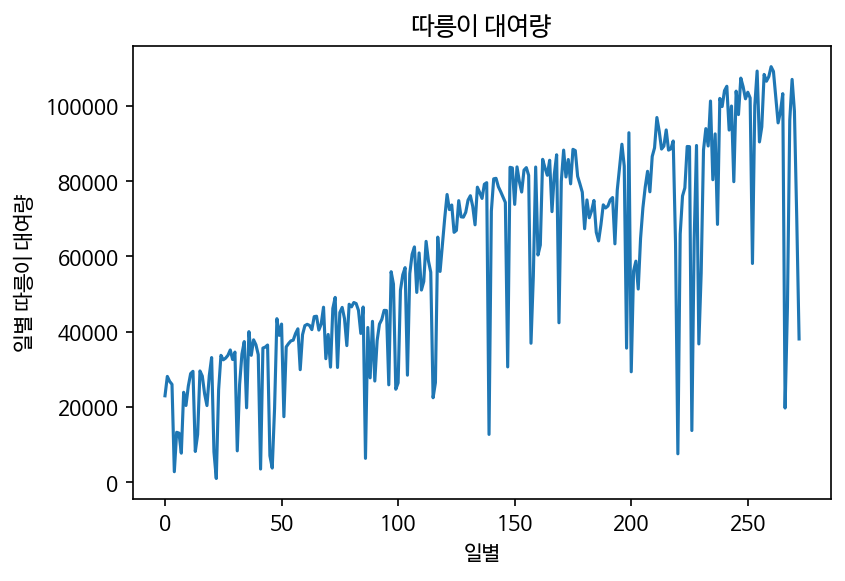

In [7]:
plt.figure(dpi = 150)

x = train['number_of_rentals'].index
y = train['number_of_rentals'].values

plt.title('따릉이 대여량')
plt.xlabel('일별')
plt.ylabel('일별 따릉이 대여량')

plt.plot(x,y)
plt.show()

### 인사이트

1. 시간이 흐를 수록 대여량이 증가하고 있따.
2. 이상치가 존재한다 -> 날씨에 영향을 받은 것일까?
3. 평일에는 출근을 하니까 대여량이 주말보다 많을 것이다.

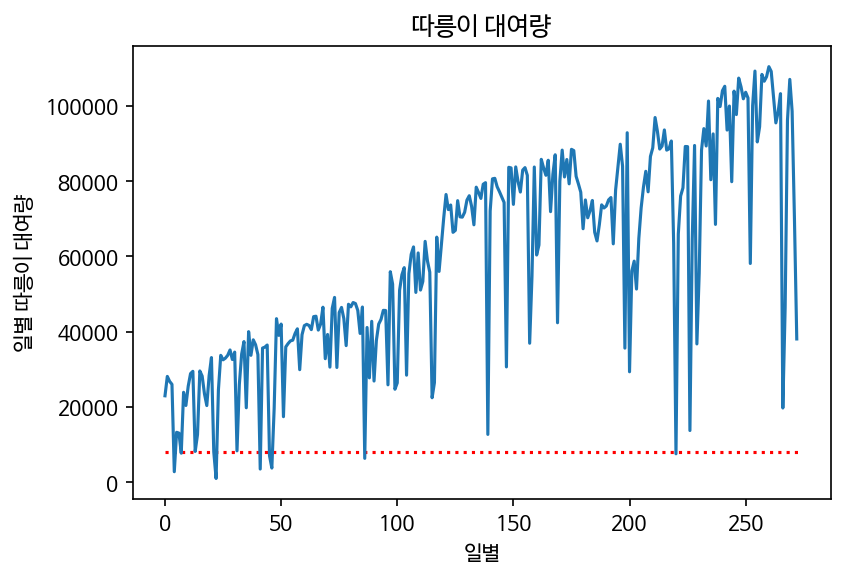

In [10]:
plt.figure(dpi = 150)

x = train['number_of_rentals'].index
y = train['number_of_rentals'].values

plt.title('따릉이 대여량')
plt.xlabel('일별')
plt.ylabel('일별 따릉이 대여량')

plt.hlines(y = 8000, xmin = 0, xmax = len(x), color = 'red', linestyle = 'dotted')
plt.plot(x,y)
plt.show()

## 2.2.따릉이 대여량이 8000이하인 값과 초과인 값의 Feature 비교

In [11]:
train[train['number_of_rentals'] <= 8000]

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
7,2018-04-08,200.939,2.405,0.054,3.865,53.243,4.312,14.211,15.676,7758
22,2018-04-23,79.554,4.000,1.000,4.127,81.182,9.250,15.158,75.608,1037
41,2018-05-12,154.541,3.946,0.588,2.590,75.405,13.938,21.632,54.392,3551
45,2018-05-16,191.108,4.000,0.797,2.815,85.405,19.688,23.105,66.554,7072
46,2018-05-17,205.378,4.000,1.000,2.451,88.885,16.062,22.526,79.257,3802
86,2018-06-26,181.939,3.851,0.723,3.526,76.351,21.125,26.789,64.865,6391
220,2020-05-09,144.142,4.000,1.000,4.192,80.034,13.938,21.158,82.162,7600


In [12]:
train[train['number_of_rentals'] <= 8000].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


wind_direction                156.688250
sky_condition                   3.775250
precipitation_form              0.735625
wind_speed                      3.344000
humidity                       76.786125
low_temp                       13.023500
high_temp                      19.375000
Precipitation_Probability      62.736500
number_of_rentals            5005.500000
dtype: float64

In [13]:
train[train['number_of_rentals'] > 8000].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


wind_direction                 204.141540
sky_condition                    2.243366
precipitation_form               0.081804
wind_speed                       2.454909
humidity                        56.140491
low_temp                        13.818547
high_temp                       23.505781
Precipitation_Probability       15.493698
number_of_rentals            61222.358491
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


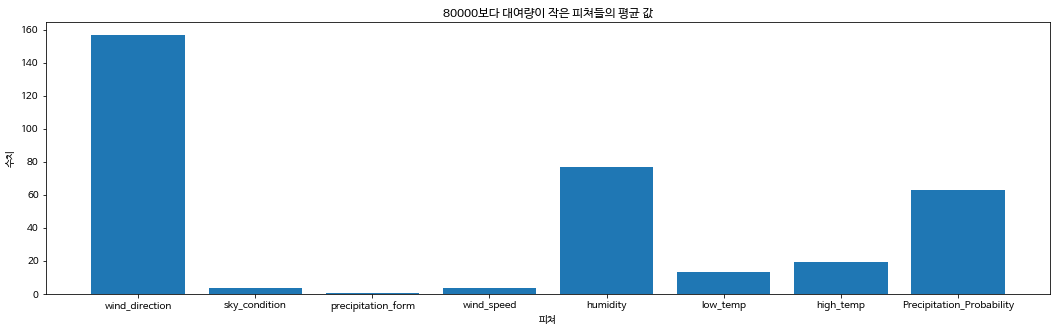

In [21]:
x = train[train['number_of_rentals'] <= 8000].drop(['number_of_rentals'], axis = 1).mean().index
y = train[train['number_of_rentals'] <= 8000].drop(['number_of_rentals'], axis = 1).mean().values

plt.figure(figsize = (18,5))
plt.title('80000보다 대여량이 작은 피쳐들의 평균 값')
plt.xlabel('피쳐')
plt.ylabel('수치')

plt.bar(x,y)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


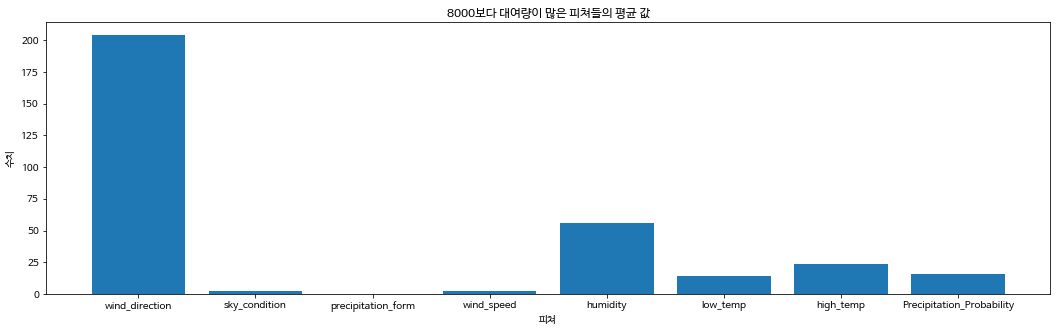

In [24]:
x = train[train['number_of_rentals'] > 8000].drop(['number_of_rentals'], axis = 1).mean().index
y = train[train['number_of_rentals'] > 8000].drop(['number_of_rentals'], axis = 1).mean().values

plt.figure(figsize = (18,5))
plt.title('8000보다 대여량이 많은 피쳐들의 평균 값')
plt.xlabel('피쳐')
plt.ylabel('수치')

plt.bar(x,y)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


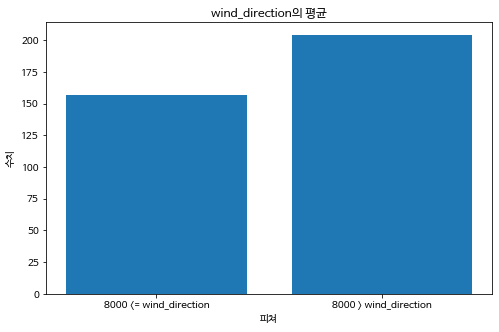

In [29]:
low = train[train['number_of_rentals'] <= 8000].mean()
high = train[train['number_of_rentals'] > 8000].mean()

x = ['8000 <= ' + low.index[0], '8000 > ' + low.index[0]]
y = [low.values[0], high.values[0]]

plt.figure(figsize = (8,5))
plt.title(low.index[0] + '의 평균')
plt.xlabel('피쳐')
plt.ylabel('수치')

plt.bar(x,y)
plt.show()

In [30]:
def compare(idx):
  x = ['8000 <= ' + low.index[idx], '8000 > ' + low.index[idx]]
  y = [low.values[0], high.values[idx]]

  plt.figure(figsize = (8,5))
  plt.title(low.index[idx] + '의 평균')
  plt.xlabel('피쳐')
  plt.ylabel('수치')

  plt.bar(x,y)
  plt.show()

# 풍향 비교

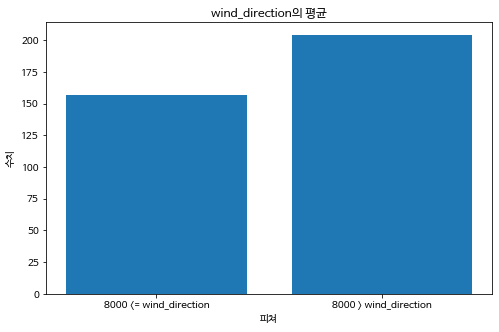

In [31]:
compare(0)

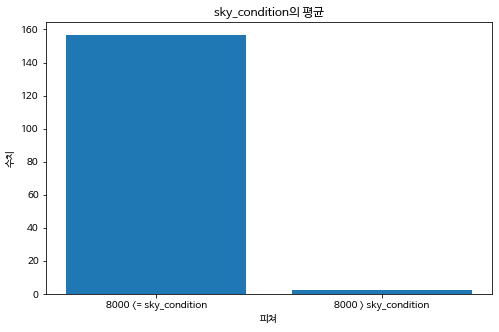

In [32]:
compare(1)

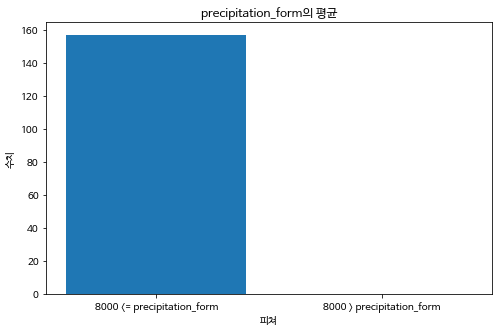

In [33]:
compare(2)

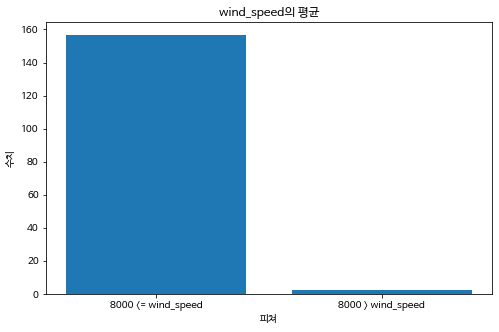

In [34]:
compare(3)

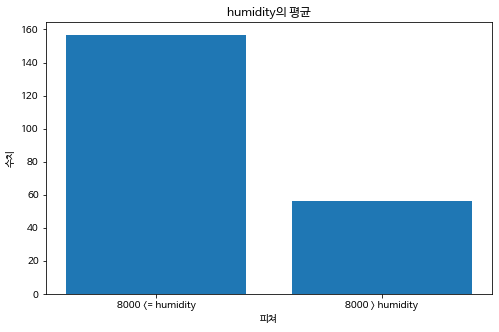

In [35]:
compare(4)

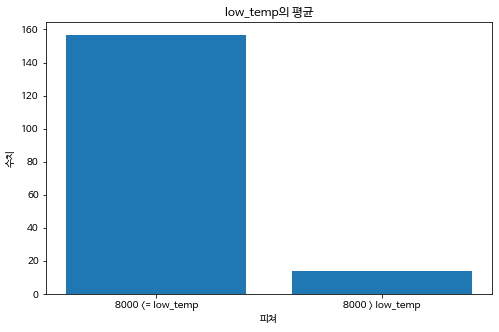

In [36]:
compare(5)

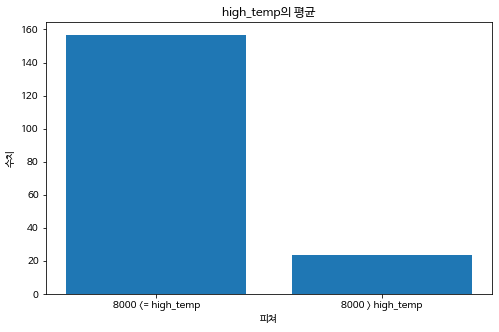

In [37]:
compare(6)

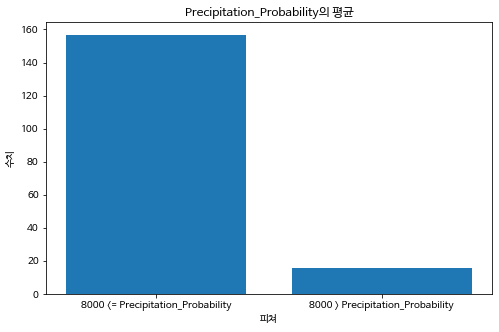

In [38]:
compare(7)

### 인사이트
강수형태와 강수확률에 따릉이 대여량에 따라서 큰 차이가 있는 것을 확인

## 2.3.통계치 분석 시각화 EDA

In [39]:
train.describe()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000


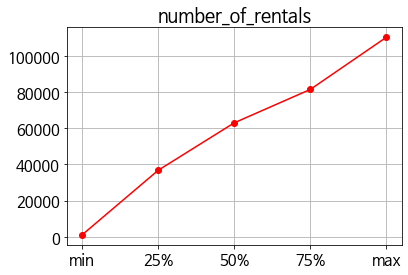

In [43]:
plt.rcParams['font.size'] = 15
data = train.describe().loc['min':'max', 'number_of_rentals']

plt.title('number_of_rentals')
plt.plot(data, color = 'red', marker = 'o')
plt.grid(True)
plt.show()

In [46]:
def describe(name):
  plt.rcParams['font.size'] = 15
  data = train.describe().loc['min':'max', name]

  plt.title(name)
  plt.plot(data, color = 'red', marker = 'o')
  plt.grid(True)
  plt.show()

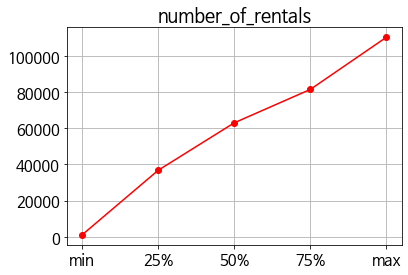

In [47]:
describe('number_of_rentals')

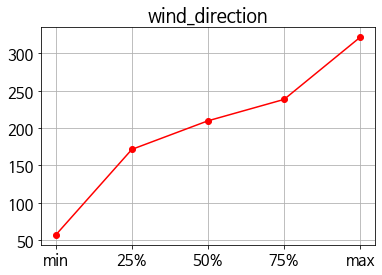

In [48]:
describe('wind_direction')

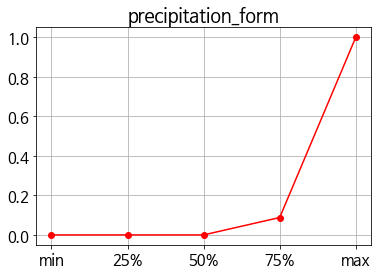

In [51]:
describe('precipitation_form')

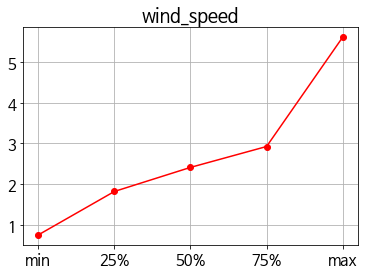

In [52]:
describe('wind_speed')

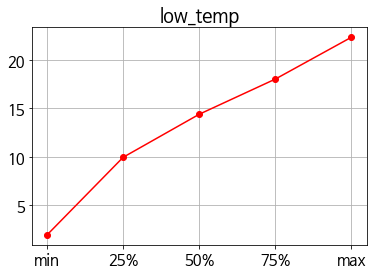

In [53]:
describe('low_temp')

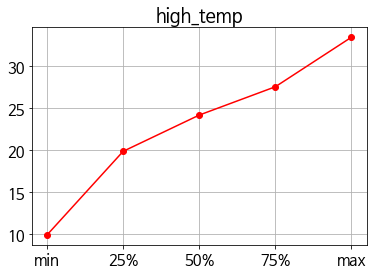

In [55]:
describe('high_temp')

### 인사이트

강수 형태 preciptiation_form은 최솟값부터 75% 구간까지는 평탄한 것에 비해 75% ~ max까지는 급격한 폭이 보인다.

### 2.3.2.precipitation_form 그래프

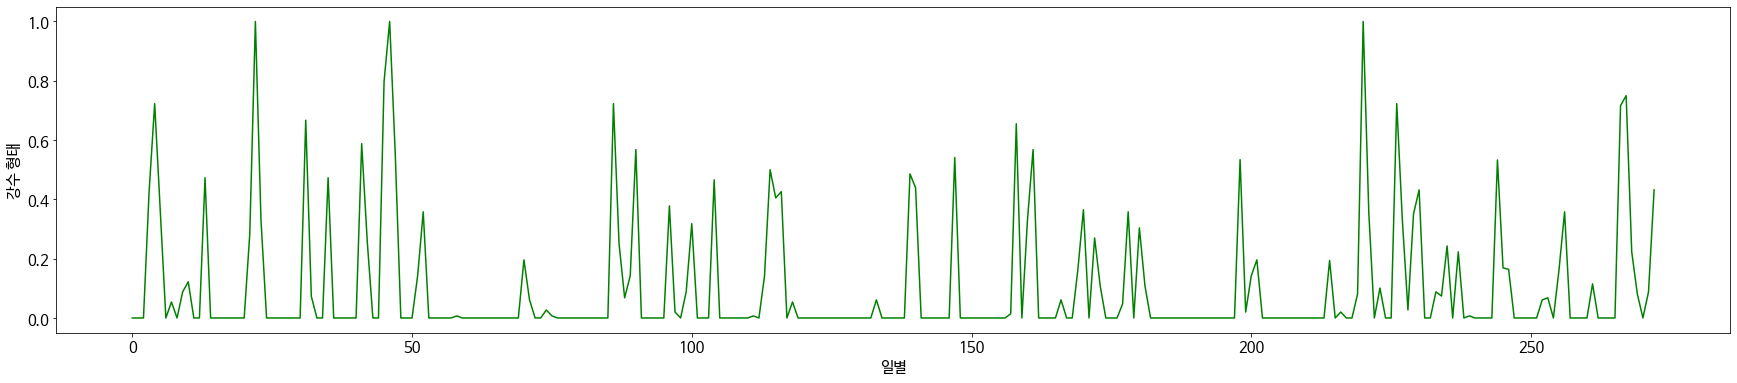

In [58]:
plt.figure(figsize = (30,6))

plt.ylabel('강수 형태')
plt.xlabel('일별')

plt.plot(train['precipitation_form'], color = 'g')
plt.show()

## 2.4.가설 검정

분석 시작전 세웠던 가설

1. 따릉이 대여량은 '강수 여부'에 큰 영향을 받을 것이다.
2. '풍속'이 강한 날은 대여량이 낮아질 것이다.
3. '최저 기온'이 낮은 날에는 따릉이 대여량이 낮아질 것이다.

### 2.4.1. 가설 1 : 따릉이 대여량은 '강수 여부'에 큰 영향을 받을 것이다.

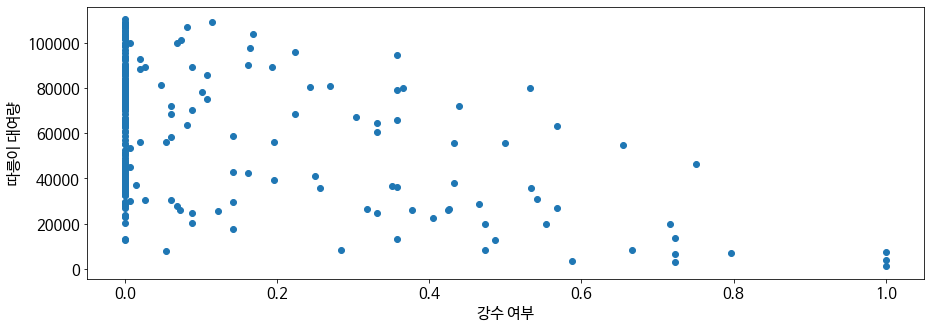

In [61]:
plt.figure(figsize = (15,5))

plt.xlabel('강수 여부')
plt.ylabel('따릉이 대여량')

plt.scatter(y = train['number_of_rentals'], x = train['precipitation_form'])
plt.show()

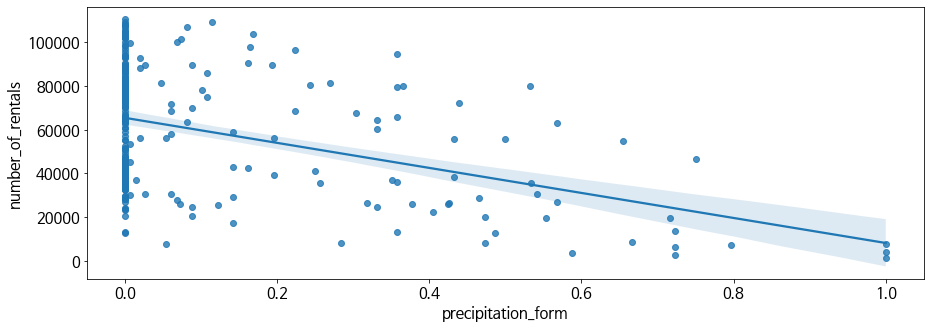

In [62]:
import seaborn as sns
plt.figure(figsize = (15,5))

sns.regplot(x = 'precipitation_form', y = 'number_of_rentals', data = train)

### 2.4.2.가설 2 : '풍속'이 강한 날은 대여량이 낮아질 것이다.

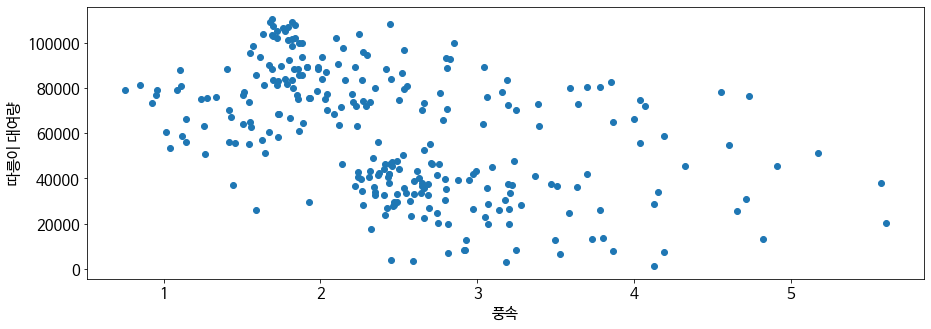

In [63]:
plt.figure(figsize = (15,5))

plt.xlabel('풍속')
plt.ylabel('따릉이 대여량')

plt.scatter(y = train['number_of_rentals'], x = train['wind_speed'])
plt.show()

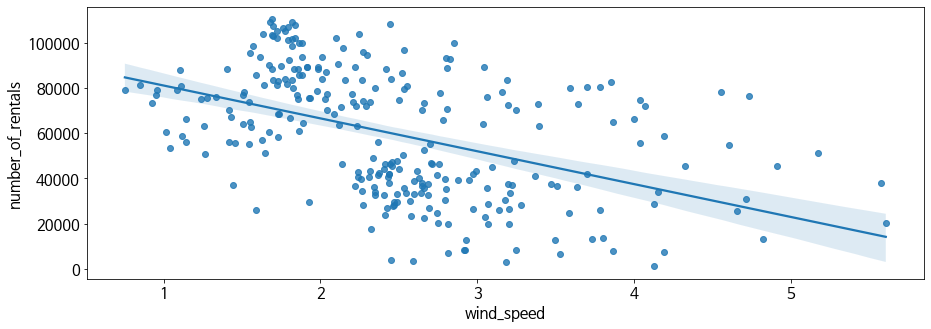

In [66]:
plt.figure(figsize = (15,5))

sns.regplot(x = 'wind_speed', y = 'number_of_rentals', data = train)

### 2.4.3.가설 3 : '최저 기온'이 낮은 날에는 따릉이 대여량이 낮아질 것이다.

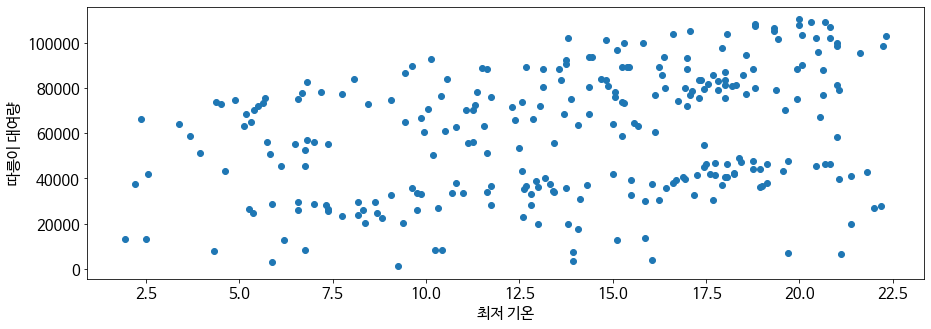

In [67]:
plt.figure(figsize = (15,5))

plt.xlabel('최저 기온')
plt.ylabel('따릉이 대여량')

plt.scatter(y = train['number_of_rentals'], x = train['low_temp'])
plt.show()

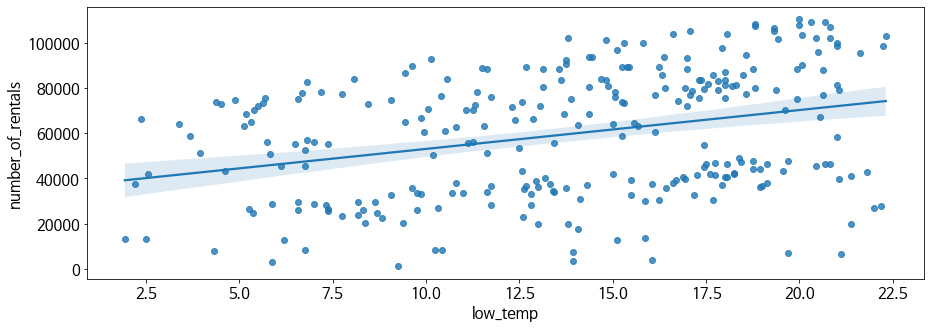

In [68]:
plt.figure(figsize = (15,5))

sns.regplot(x = 'low_temp', y = 'number_of_rentals', data = train)

### 인사이트

시각화를 통하여 강수 형태, 풍속, 최저 기온이 따릉이 대여량에 영향을 미친다는 것을 파악!

# 3.데이터 처리

## 3.1.Feature Engineering

In [69]:
#drop() 메소드를 이용하여 열(date_time) 제거

train = train.drop(['date_time'], axis = 1)
test = test.drop(['date_time'], axis = 1)

## 3.2.Feature Selection

In [72]:
# x 할당
X = train[['wind_direction',	'sky_condition',	'precipitation_form',	'wind_speed',	'humidity',	'low_temp',	'high_temp',	'Precipitation_Probability']]

In [73]:
# y 할당
y = train['number_of_rentals']

# 4.모델링

## 4.1.모델 선택

In [74]:
from sklearn.ensemble import RandomForestRegressor

# 모델 선언
model = RandomForestRegressor()

## 4.2.모델 학습

In [75]:
# 모델 학습
model.fit(X,y)

RandomForestRegressor()

## 4.3.예측

In [76]:
predict = model.predict(test)

In [77]:
submission['number_of_rentals'] = predict

submission.head()

,date_time,number_of_rentals
0,2021-04-01,54289.71
1,2021-04-02,37738.83
2,2021-04-03,43895.90
3,2021-04-04,25698.64
4,2021-04-05,67350.87


In [78]:
submission.to_csv('submission3.csv', index = False)